# SetUP

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
#implement linear regression
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor

# Utils Functions 

In [2]:
def simplelinear(train,test, target = 'voltage maximale ') : 
    "this function create a linear Model that predict target"
    x_train = train.drop(['voltage maximale ', 'amperage max' , 'fréquence.1'],1)
    y_train = train[target]
    x_test = test.drop(['voltage maximale ', 'amperage max', 'fréquence.1'],1)
    y_test = test[target]
    model = LinearRegression()
    model.fit(x_train.values,y_train)
    preds = model.predict(x_test.values)
    rms=np.sqrt(np.mean(np.power((np.array(y_test)-np.array(preds)),2)))
    return model , rms

def MLP_model(train,test, target = 'voltage maximale ') : 
    "this function create a linear Model that predict target"
    x_train = train.drop(['voltage maximale ', 'amperage max' , 'fréquence.1'],1)
    y_train = train[target]
    x_test = test.drop(['voltage maximale ', 'amperage max', 'fréquence.1'],1)
    y_test = test[target]
    model =  MLPRegressor(hidden_layer_sizes=(10,10), activation='relu',random_state=1, max_iter=500)
    model.fit(x_train.values,y_train)
    preds = model.predict(x_test.values)
    rms=np.sqrt(np.mean(np.power((np.array(y_test)-np.array(preds)),2)))
    return model , rms



In [3]:
def xgboost_model_voltage(train,test, target = 'voltage maximale ') :
    "this function create a xgbosst Model that predict target"
    x_train = train.drop(['voltage maximale ', 'amperage max' , 'fréquence.1'],1)
    y_train = train[target]
    x_test = test.drop(['voltage maximale ', 'amperage max', 'fréquence.1'],1)
    y_test = test[target]
    print(x_train.shape)

    model =XGBRegressor( booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.6, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=2, min_child_weight=1.5, n_estimators=5000,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             reg_alpha=0, reg_lambda=0, scale_pos_weight=1, 
             silent=None, subsample=0.8, verbosity=1 )
                                                                  
    model.fit(x_train.values,y_train)
    preds = model.predict(x_test.values)
    rms=np.sqrt(np.mean(np.power((np.array(y_test)-np.array(preds)),2)))
    return model , rms


def xgboost_model_amperage(train,test, target = 'voltage maximale ') :
    "this function create a xgbosst Model that predict target"
    x_train = train.drop(['voltage maximale ', 'amperage max' , 'fréquence.1'],1)
    y_train = train[target]
    x_test = test.drop(['voltage maximale ', 'amperage max', 'fréquence.1'],1)
    y_test = test[target]
    model =XGBRegressor( booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.6, gamma=0,
             importance_type='gain', learning_rate=0.0001, max_delta_step=0,
             max_depth=10, min_child_weight=1.5, n_estimators=5,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             reg_alpha=0, reg_lambda=0, scale_pos_weight=1, 
             silent=None, subsample=0.8, verbosity=1 )
                                                                  
    model.fit(x_train.values,y_train)
    preds = model.predict(x_test.values)
    rms=np.sqrt(np.mean(np.power((np.array(y_test)-np.array(preds)),2)))
    return model , rms

# Getting Data 

In [17]:
data = pd.read_csv('modele-electromagnetique-1.csv')

In [18]:
data.columns

Index(['fréquence', 'résistance', 'apmlitudes de déplacements max',
       'position initial', 'fréquence.1', 'voltage maximale ', 'amperage max',
       'Unnamed: 7', 'Vmax/Dmax', 'Fréquence'],
      dtype='object')

In [19]:
data.drop(['Unnamed: 7','Vmax/Dmax', 'Fréquence' ],1,inplace=True)

In [20]:
data.dropna(inplace = True)

# EDA 

In [21]:
data.head()
data['p2']=data['position initial']**2
data['f2']=data['fréquence']**0.5
data['p3']=data['position initial']**3
data['rapport']=np.exp(data['fréquence']*data['apmlitudes de déplacements max'])
data['reis2']=1/(1+np.exp(-data['résistance']**0.5))
data['apmlitudes de déplacements max']=(1/(10*data['apmlitudes de déplacements max']))

In [22]:
for f in data.columns : 
    data[f] = data[f].astype(float)

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118 entries, 0 to 117
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   fréquence                       118 non-null    float64
 1   résistance                      118 non-null    float64
 2   apmlitudes de déplacements max  118 non-null    float64
 3   position initial                118 non-null    float64
 4   fréquence.1                     118 non-null    float64
 5   voltage maximale                118 non-null    float64
 6   amperage max                    118 non-null    float64
 7   p2                              118 non-null    float64
 8   f2                              118 non-null    float64
 9   p3                              118 non-null    float64
 10  rapport                         118 non-null    float64
 11  reis2                           118 non-null    float64
dtypes: float64(12)
memory usage: 12.0 KB

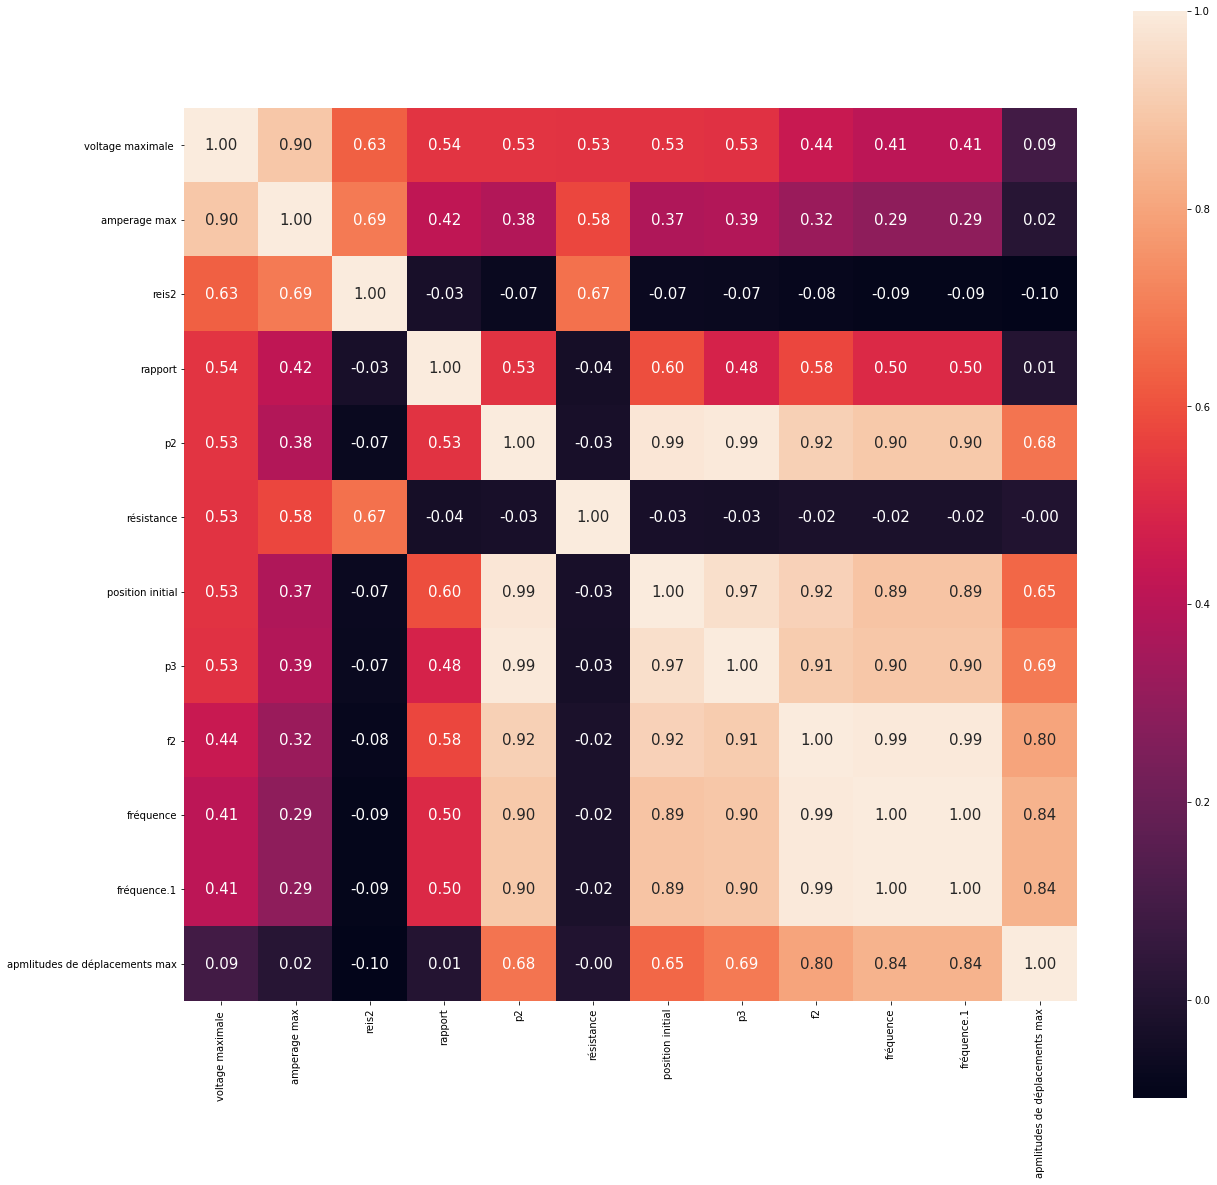

In [24]:
corrmat = data.corr()
k = 15 #number of variables for heatmap
cols = abs(corrmat).nlargest(k, 'voltage maximale ')['voltage maximale '].index
cm = np.corrcoef(data[cols].values.T)
plt.figure(figsize=(20,20))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 15}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118 entries, 0 to 117
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   fréquence                       118 non-null    float64
 1   résistance                      118 non-null    float64
 2   apmlitudes de déplacements max  118 non-null    float64
 3   position initial                118 non-null    float64
 4   fréquence.1                     118 non-null    float64
 5   voltage maximale                118 non-null    float64
 6   amperage max                    118 non-null    float64
 7   p2                              118 non-null    float64
 8   f2                              118 non-null    float64
 9   p3                              118 non-null    float64
 10  rapport                         118 non-null    float64
 11  reis2                           118 non-null    float64
dtypes: float64(12)
memory usage: 12.0 KB

In [26]:
fix_fre = data[(data['fréquence']==2.8)]
fix_fre

,fréquence,résistance,apmlitudes de déplacements max,position initial,fréquence.1,voltage maximale,amperage max,p2,f2,p3,rapport,reis2
0,2.8,1.0,20.20202,0.002,2.8,0.08970,0.071875,0.000004,1.67332,8.000000e-09,1.013956,0.731059
1,2.8,2.0,20.20202,0.002,2.8,0.10350,0.100625,0.000004,1.67332,8.000000e-09,1.013956,0.804430
2,2.8,3.0,20.20202,0.002,2.8,0.11730,0.119025,0.000004,1.67332,8.000000e-09,1.013956,0.849675
3,2.8,4.0,20.20202,0.002,2.8,0.12650,0.136275,0.000004,1.67332,8.000000e-09,1.013956,0.880797
4,2.8,5.0,20.20202,0.002,2.8,0.14950,0.145475,0.000004,1.67332,8.000000e-09,1.013956,0.903442
5,2.8,10.0,20.20202,0.002,2.8,0.17825,0.179630,0.000004,1.67332,8.000000e-09,1.013956,0.959390
6,2.8,20.0,20.20202,0.002,2.8,0.18400,0.206080,0.000004,1.67332,8.000000e-09,1.013956,0.988706
7,2.8,40.0,20.20202,0.002,2.8,0.21850,0.223330,0.000004,1.67332,8.000000e-09,1.013956,0.998211
8,2.8,50.0,20.20202,0.002,2.8,0.23000,0.227125,0.000004,1.67332,8.000000e-09,1.013956,0.999151
9,2.8,100.0,20.20202,0.002,2.8,0.25070,0.234830,0.000004,1.67332,8.000000e-09,1.013956,0.999955


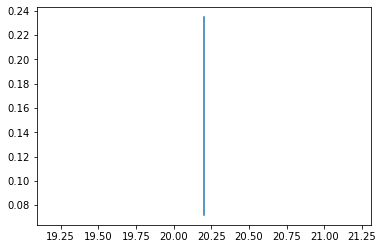

In [27]:
plt.plot(fix_fre['apmlitudes de déplacements max'].values ,fix_fre['amperage max'].values )

# Feature Engineering

In [28]:
# Train test split 
train , test = train_test_split( data , test_size = 0.2 , shuffle=True ,random_state = 55 )

# Modeling Part 

## Model for "voltage maximale"

In [29]:
linear_model , rmse = simplelinear(train,test ,target = 'voltage maximale ')
print('test root mean square error = ', rmse)

test root mean square error =  0.036196131646697716


In [30]:
xgb_model_voltage , rmse = xgboost_model_voltage(train,test ,target = 'voltage maximale ')
print('test root mean square error = ', rmse)

(94, 9)
test root mean square error =  0.02436896782808933


## Simulation 

In [31]:
def f( t , freq ,amp) : 
    return amp * (np.sin(2*15*np.pi*t))

In [32]:
data.columns

Index(['fréquence', 'résistance', 'apmlitudes de déplacements max',
       'position initial', 'fréquence.1', 'voltage maximale ', 'amperage max',
       'p2', 'f2', 'p3', 'rapport', 'reis2'],
      dtype='object')

In [33]:
freq = 15
res = 20
amp = 0.003
init_position = 0.006
input = np.array([freq , res , 0.1/amp , init_position,init_position**2,freq**0.5,init_position**3,np.exp(freq*amp),1/(1+np.exp(-res**0.5))])

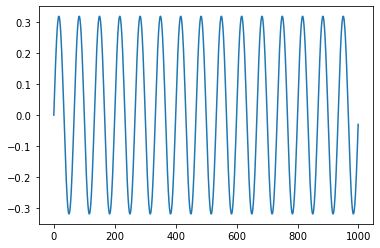

In [34]:
pred = xgb_model_voltage.predict(input.reshape(1,-1))
output_signal = [ f(t,freq,pred[0]) for t in np.arange(0,1,0.001)]
plt.plot(output_signal)
plt.show()

## Model for "amperage max"

In [35]:
linear_model , rmse = simplelinear(train,test ,target = 'amperage max')
print('test root mean square error = ', rmse)

test root mean square error =  0.038352078432082354


In [36]:
xgb_model_amperage , rmse = xgboost_model_amperage(train,test ,target = 'amperage max')
print('test root mean square error = ', rmse)

test root mean square error =  0.24948522533682221


## Simulation 

In [ ]:
freq = 15
res = 50
amp = 0.004
init_position = 0.009
input = np.array([freq , res , 0.1/amp , init_position,init_position**2,freq**0.5,init_position**3,np.exp(freq*amp),1/(1+np.exp(-res**0.5))]) 

In [ ]:
pred = linear_model.predict(input[0:9].reshape(1,-1))

In [ ]:
pred = linear_model.predict(input.reshape(1,-1))
output_signal = [ f(t,freq,pred[0]) for t in np.arange(0,1,0.001)]
plt.plot(output_signal)
plt.show()

In [ ]:
import pickle
# save model to file
pickle.dump(xgb_model_voltage, open("model_voltage.pickle.dat", "wb"))
pickle.dump(linear_model, open("model_amperage.pickle.dat", "wb"))



In [42]:
# load model from file

import pickle
import numpy as np
from sklearn.linear_model import LinearRegression,Lasso,Ridge

#implement linear regression
from xgboost import XGBRegressor
import tkinter as tk


freq = 5
res = 0
amp = 0.003
init_position = 0.006
input = np.array([freq , res , 0.1/amp , init_position,init_position**2,freq**0.5,init_position**3,np.exp(freq*amp),1/(1+np.exp(-res**0.5))]) 

def f( t , freq ,amp) : 
    return amp * (np.sin(2*15*np.pi*t))

model_voltage = pickle.load(open("model_voltage.pickle.dat", "rb"))
model_amperage = pickle.load(open("model_amperage.pickle.dat", "rb"))

voltage = model_voltage.predict(input.reshape(1,-1))
amperage = model_amperage.predict(input.reshape(1,-1))


In [ ]:

fields = ('Frequency', 'Resistance', 'Amplitude', 'init position', 'Amperage','Voltage','Puissance')

import pickle
import numpy as np
from sklearn.linear_model import LinearRegression,Lasso,Ridge

#implement linear regression
from xgboost import XGBRegressor
import tkinter as tk


def f( t , freq ,amp) : 
    return amp * (np.sin(2*15*np.pi*t))

model_voltage = pickle.load(open("model_voltage.pickle.dat", "rb"))
model_amperage = pickle.load(open("model_amperage.pickle.dat", "rb"))



def Calculate(entries):
    # period rate:
    freq = float(entries['Frequency'].get())
    res = float(entries['Resistance'].get())
    amp = float(entries['Amplitude'].get())
    init_position = float(entries['init position'].get())
    input = np.array([freq , res , 0.1/amp , init_position,init_position**2,freq**0.5,init_position**3,np.exp(freq*amp),1/(1+np.exp(-res**0.5))])  

    voltage = model_voltage.predict(input.reshape(1,-1))
    amperage = model_amperage.predict(input.reshape(1,-1))
    
    entries['Amperage'].delete(0, tk.END)
    entries['Amperage'].insert(0, amperage )
    entries['Voltage'].delete(0, tk.END)
    entries['Voltage'].insert(0, voltage )
    entries['Puissance'].delete(0, tk.END)
    entries['Puissance'].insert(0, amperage*voltage )

def makeform(root, fields):
    entries = {}
    for field in fields:
        print(field)
        row = tk.Frame(root)
        lab = tk.Label(row, width=22, text=field+": ", anchor='w')
        ent = tk.Entry(row)
        ent.insert(0, "0")
        row.pack(side=tk.TOP, 
                 fill=tk.X, 
                 padx=5, 
                 pady=5)
        lab.pack(side=tk.LEFT)
        ent.pack(side=tk.RIGHT, 
                 expand=tk.YES, 
                 fill=tk.X)
        entries[field] = ent
    return entries

if __name__ == '__main__':
    root = tk.Tk()
    ents = makeform(root, fields)
    b1 = tk.Button(root, text='Calculate',
           command=(lambda e=ents: Calculate(e)))
    b1.pack(side=tk.LEFT, padx=5, pady=5)

    root.mainloop()